# **ML Project #1 - Titanic Survival Prediction** 

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/500px-RMS_Titanic_3.jpg)


Hey there, welcome to my ML GitHub's first project! This one is a classic. Titanic survival prediction project is like ABC... for the practical machine learning world!

We are given a dataset (CSV file) and have been asked to build a simple model that, given a user, predicts whether they were likely to survive the accident or not!

This project consists of 4 core steps, often seen in almost all ML projects:

1. Import & Load Data
2. Exploratory Data Analysis
3. Preprocessing
4. Model Training + Prediction

Throughout the project you will see several such markdown boxes - they will explain what's gonna happen in the next few cells. But detailed explanation of each cell will be in the comments! Enjoy!

# **1. Import & Load Data**

In [1]:
#importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#used the kaggle system for all projects - the following lines build the link to the input files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#load data given as CSV files - they stand for 'Comma Separated Values'
#PANDAS library loads then in as DataFrames
#two different sets, one used for training, the other for testing

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

#the .head() functions shows the first couple lines from the DataFrame
#this is done to get familiar with the data

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2. Exploratory Data Analysis**

Exploratory data analysis, more commonly known as EDA, is a way of getting familiar with the data. Not limited to machine learning applications, this technique can be used in various ways to figure out things like how the data is configured, how it can be used, etc.

Some common ways of doing EDA is finding out statistical stuff (for numerical data), visualising the data, making time series charts, and many more. 

Below I have done EDA on the Titanic dataset, specifically the one meant to be used for training the the model.

In [3]:
#.info() gives information about the DataFrame like columns, their datatypes, null values etc

train.info()

#.isnull() returns True if the value is null, False otherwise - a grid of booleans
#the sum() is used to sum down each column - True is 1, 0 is False
#this technique tells us how many null values every column has!

train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#this gives quick stats summary for all numeric columns in the DataFrame!
#like mean, std dev, min, max, etc

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#to do in depth EDA, I try figuring out what features has the maximum impact on the survival
#below code shows the avg survival rate for each gender

train.groupby(by='Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
#same way, this one shows avg survival rate per passenger class

train.groupby(by='Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

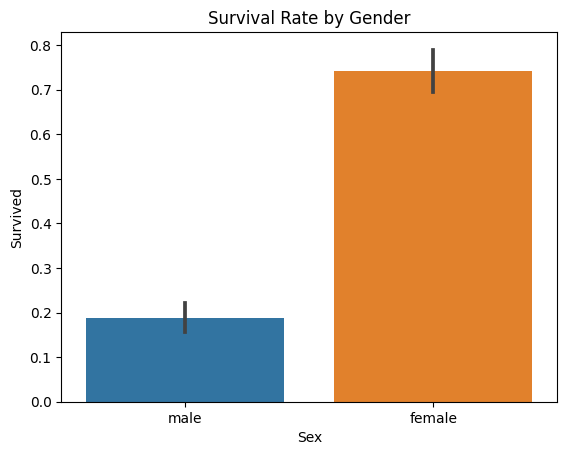

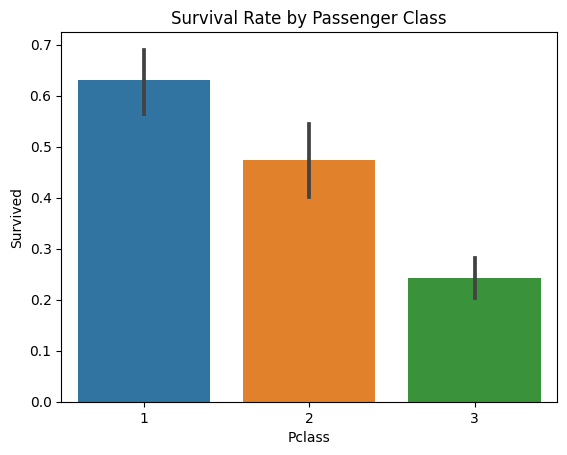

In [7]:
#below are visualisations of the same - used libraries seaborn and matplot!

sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()